# PHY5001 Assessment 2
##  Grover's algorithm 

This is the Jupyter Notebook which accompanies the pdf guide for Assignment 2, which focuses on Grover's Algorithm. Be advised that you should read the pdf as well, as there are questions which you will need to answer.

### Table of Contents
This hyperlinked table of contents may help reduce how much scrolling around you need to do to find the appropriate cells

- [Task 2: Selector](#Task2_cell)
    - [(a) GateSwitch](#Task2a_cell)
    - [(b) SelectorSix](#Task2b_cell)

    
- [Task 3: Amplifier](#Task3_cell)


- [Task 4: Putting together Grover's algorithm](#Task4_cell)


- [Task 5: Comparison of classical and quantum search](#Task5_cell)
    - [(a) RandomiseSix](#Task5a_cell)
    - [(b) Plotting comparison](#Task5Plot_cell)
    
    
- [Testing Functions](#Testing)
    - [Task 2 Testing](#Task2T_cell)
    - [Task 3 Testing](#Task3T_cell)
    - [Task 4 Testing](#Task4T_cell)
    - [Task 5 Testing](#Task5T_cell)

## Housekeeping
The cells below will import the appropriate packages you need for this assignment, assuming they are installed, and apply particular configuration settings for `DumpMachine`. You will need to run these cells each time you open this file to start work, as without them your functions below will not run as intended. 

In [3]:
import qsharp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%%qsharp
open Microsoft.Quantum.Diagnostics;

In [5]:
%config dump.basisStateLabelingConvention="BitString" 
%config dump.phaseDisplayStyle="NumberOnly"

## Task 2: Selector

<a id='Task2_cell'></a>

In this task, you will write code to set up the **Selector** component of Grover's algorithm. You will need to write two functions to build this Selector:
 - A function **GateSwitch** which applies Pauli-X gates to qubits in a 6 qubit array, using a Boolean array input to configure which qubits will be modified by the Pauli-X gates
 - A function **SelectorSix** which takes a 6 qubit array input and:
   - applies GateSwitch
   - applies a controlled-Z gate to the entire array, with the 6th qubit in the array being the target
   - applies GateSwitch again


<a id='Task2a_cell'></a>
In the cell below, write your code for **GateSwitch**.

*Hint: You will likely need to include a `for` loop and an `if` condition to make this work.*

In [6]:
%%qsharp
operation GateSwitch(target: Qubit[], pattern: Bool[]) : Unit {
    mutable i = 0; 
    for q in target {
        if pattern[i] {
            X(q); 
        }
        i += 1; 
    }    
}

<a id='Task2b_cell'></a>
In the cell below, write your code for **SelectorSix**.

*Hint: Remember to use indices to indicate which qubit in the array you are referring to.*

In [8]:
%%qsharp
operation SelectorSix(target: Qubit[], pattern: Bool[]) : Unit {
    GateSwitch(target, pattern); 
    Controlled Z(target[0..4],target[5]); 
    GateSwitch(target, pattern); 
}

## Task 3: Amplifier

<a id='Task3_cell'></a>

In this task, you will write code to set up the **Amplifier** component of Grover's algorithm. You will need to write one function to build this Amplifier:
 - A function **AmplifySix** which applies which applies the appropriate gates to a 6 qubit array, with the target of the controlled-Z gate being the 6th qubit in the array.
 
 
In the cell below, write your code for **AmplifySix**

*Hint: Remember to use indices to indicate which qubit in the array you are referring to. In Workshops you have seen the tools needed for at least 3 different approaches to writing AmplifySix - you may find it useful to use two `for` loops for part of this, but do not have to use any*

In [9]:
%%qsharp
operation AmplifySix(target: Qubit[]) : Unit {
    ApplyToEach(H, target); 
    ApplyToEach(X, target); 
    Controlled Z(target[0..4],target[5]);
    ApplyToEach(X, target); 
    ApplyToEach(H, target); 
}

<a id='Task4_cell'></a>
## Task 4: Putting together Grover's algorithm

In this task, you will write:
- A function **SixQGroverIteration** which will apply SelectorSix and AmplifySix as required for a single iteration of Grover's algorithm
- A function **SixQGrovers** which will apply SixQGroverIteration multiple times in a row, as determined by an input `repeats`

<a id='Task4a_cell'></a>
In the cell below, write your code for **SixQGroverIteration**.

In [10]:
%%qsharp
operation SixQGroverIteration(target: Qubit[], pattern: Bool[]) : Unit {
    SelectorSix(target, pattern); 
    AmplifySix(target); 
}

In the cell below, write your code for **SixQGrovers**

*Hint: One way to approach this is to write a `for` loop which will apply **SixQGroverIteration** on each repeat*

In [11]:
%%qsharp
operation SixQGrovers(target: Qubit[], pattern: Bool[], repeats: Int) : Unit {
    for i in 1..repeats {
        SixQGroverIteration(target, pattern); 
    }
}

<a id='Task5_cell'></a>
## Task 5: Comparison of classical and quantum search

Now that we have a function that performs a single iteration of Grover's algorithm, let's work towards comparing the performance of quantum search against classical search. To do so, you will need to write:
- A function **RandomiseSix**, which should use Hadamard gates on all 6 qubits in a 6 qubit input to create a completely randomised quantum superposition, in order to allow a fair test of the algorithm
- Plotting code for comparing the performance of classical and quantum search algorithms


<a id='Task5a_cell'></a>
In the cell below, write your code for **RandomiseSix**.

*Hint: Remember to use indices to indicate which qubit in the array you are referring to.*

In [12]:
%%qsharp
operation RandomiseSix(target: Qubit[]) : Unit {
  ApplyToEach(H, target);    
}

The cell below contains a function which will combine your RandomiseSix with your SixQGrovers. This will allow you to simulate the action of Grover's algorithm for searching. Assuming you have checked that your functions above work correctly, this should not need any adjustments in order to run. 

In [13]:
%%qsharp
operation SixGroverRun(repeats: Int, pattern: Bool[]) : Unit {
    use q = Qubit[6];
    RandomiseSix(q);
    SixQGrovers(q, pattern, repeats);
DumpMachine();
ResetAll(q);        
}


In the cell below:
- run a single iteration (eg. repeats = 1) of SixGroverRun for any 6 qubit Boolean pattern you choose - this will be fed into the selector. 
- Make note of the probability of measuring the state you have set the selector for.

Repeat the above, increasing the number of repeats from 1 to 20 in steps of 1, recording the probability of measuring the state you have selected at each point.

*Note: You may notice that the probability changes in an unexpected manner after 6 repeats - this is not an error!*

In [15]:
%%qsharp

// Example: Call SixGroverRun with 2 repeats and pattern 101010:
SixGroverRun(6, [true,false,true,false,true,false])


<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.00541955430666803"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668087"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.00541955430666803"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.9983+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="99.65856807867996"></progress>
    <span>99.6586%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.00541955430666803"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.00541955430666803"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668235"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668226"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task5Plot_cell'></a>
Now for the comparison between classical and quantum search. Six qubits are capable of representing, at most, 64 ($2^{6}$) different objects simultaneously. For a fair comparison, we need to consider how many attempts it would take a classical computer to determine whether a particular item appears on a list. For a list with $N$ items, the probability $P$ of finding a particular item within $t$ attempts is:

$$P = 1 - (1 - \frac{1}{N})^t$$

In the cell below, write code which:
- builds an array `P_quant` out of the probability values you recorded above when running Grover's algorithm
- creates a linspace `t_quant` with 20 values, starting at 1 and ending at 20
- creates a linspace `t_class` with 250 values, starting at 1 and ending at 250
- calculate the classical probability `P_class` at each value of `t_class`, assuming $N = 64$ and using the equation above
- Make a figure which shows `P_class` plotted against `t_class`, and `P_quant` plotted against `t_quant` with appropriate axis labels, legend labels and title


Copy the image of the figure into your Assignment 1 document (by right-clicking on it and choosing "copy image as" or "save image as", and answer the questions in the Assignment 1 pdf which are about this plot

Text(0.5, 1.0, 'Quantum vs. Classical')

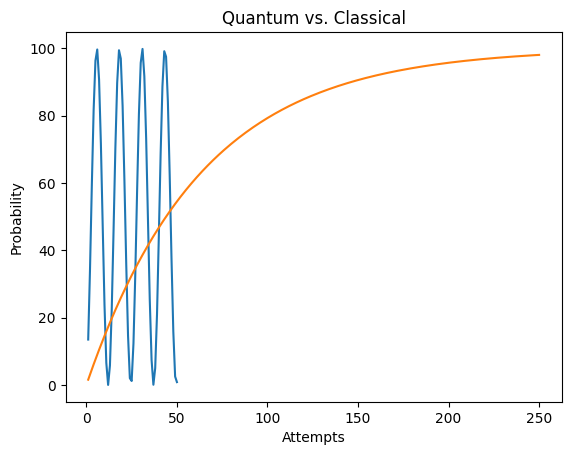

In [169]:
P_quant = [13.4827, 34.3895, 59.1380, 81.6377, 96.3515, 99.6586, 90.7449, 71.8042, 47.4976, 23.8068, 6.5620, 0.0071, 5.7550, 22.3914, 45.8221, 70.2809, 89.7488, 99.4347, 96.9550, 82.9200, 60.7836, 35.9935, 14.6502, 2.0063, 1.1733, 12.3563, 32.8032, 57.4821, 80.3197, 95.6958, 99.8264, 91.6951, 73.3029, 49.1760, 25.2518, 7.4181, 0.0634, 4.9979, 21.0071, 44.1512, 68.7347, 88.7077, 99.1550, 97.5055, 84.1652, 62.4171, 37.6132, 15.8576, 2.5042, 0.8393]
t_quant = np.linspace(1, 50, num=50) 

t_class = np.linspace(1, 250, num=250)
P_class = (1 - (63/64)**t_class)*100

# Plotting - Line/points

plt.plot(t_quant, P_quant, label="Quantum") 
plt.plot(t_class, P_class, label="Classical") 
plt.xlabel("Attempts") 
plt.ylabel("Probability") 
plt.title("Quantum vs. Classical") 


Text(0.5, 1.0, 'Quantum vs. Classical')

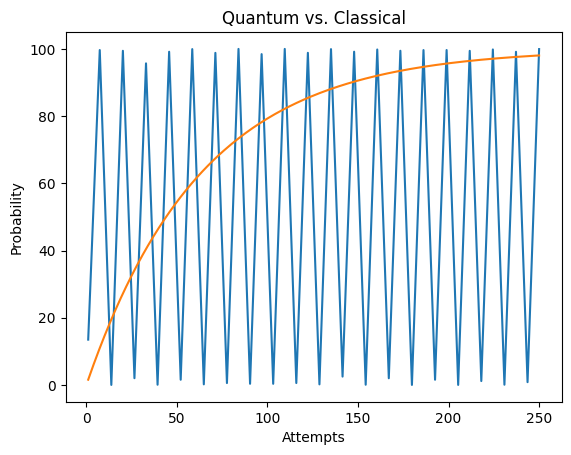

In [247]:
P_quant = [13.4827, 99.6586, 0.0071, 99.4347, 2.0063, 95.6958,  0.0634, 99.1550, 1.5476, 99.9381, 0.1762, 98.8199, 0.5606, 99.9935, 0.3451, 98.4452, 0.3378, 99.9924, 0.5700, 98.8334, 0.1710, 99.9350, 2.4847, 99.1664, 0.0603, 99.8212, 1.9888, 99.4440, 0.0060, 99.6512, 1.5470, 99.6658, 0.0081, 99.4253, 1.1599, 99.8316, 0.0666, 99.1435, 0.8279, 99.9412]
t_quant = np.linspace(1, 250, num=40) 

t_class = np.linspace(1, 250, num=250)
P_class = (1 - (63/64)**t_class)*100

# Plotting - Line/points

plt.plot(t_quant, P_quant, label="Quantum") 
plt.plot(t_class, P_class, label="Classical") 
plt.xlabel("Attempts") 
plt.ylabel("Probability") 
plt.title("Quantum vs. Classical") 

## Testing
<a id='Testing'></a>
This section contains scripts that will allow you to check whether functions you have written above are working as intended. Note that this is not a guarantee - you should still check the code you write to be sure that it is applying logic gates in the sequence that you intend - but most common errors will be caught with these checks.

<a id='Task2T_cell'></a>
### Task 2 Testing

The cells below will allow you to test that **GateSwitch** is working as intended. You must first run the cell which builds the function **TestGateSwitch**, and then the simulation operation beneath it.

If your **GateSwitch** is working correctly, then running the function **TestGateSwitch** will produce a ``DumpMachine`` result where there is a 25% probability of measuring the states $|110101\rangle$, $|110001\rangle$, $|100101\rangle$, and $|100001\rangle$. 



In [16]:
%%qsharp
operation TestGateSwitch() : Unit {
use q = Qubit[6];
    H(q[1]);
    H(q[3]);
let testpattern = [true, true,false,true,false,true];   
GateSwitch(q,testpattern);        
DumpMachine();    
ResetAll(q);     
}

In [17]:
%%qsharp
TestGateSwitch()

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


$|\psi\rangle = \frac{1}{2}|100001\rangle+\frac{1}{2}|100101\rangle+\frac{1}{2}|110001\rangle+\frac{1}{2}|110101\rangle$

The cells below will allow you to test that **SelectorSix** is working as intended. You must first run the cell which builds the function **TestSelectorSix**, and then the simulation operation beneath it.

If your **SelectorSix** is working correctly, then running the function **TestSelectorSix** will produce a `DumpMachine` result where every state has a 1.5625% probability of being measured, and the state $|001010\rangle$ has a phase of 3.1416.

In [18]:
%%qsharp
operation TestSelectorSix() : Unit {
  use q = Qubit[6];  
    H(q[0]);
    H(q[1]);
    H(q[2]);
    H(q[3]);
    H(q[4]);
    H(q[5]);
let testpattern = [true,true,false,true,false,true];    
SelectorSix(q,testpattern);    
DumpMachine();    
ResetAll(q);    
}

In [19]:

qsharp.eval(f"TestSelectorSix()")

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task3T_cell'></a>
### Task 3 Testing

The cells below will allow you to test that **AmplifySix** is working as intended. You must first run the cell which builds the function **TestAmplifySix**, and then the simulation operation beneath it.

If your **AmplifySix** is working correctly, then running the function **TestAmplifySix** will produce a `DumpMachine` result where states $|000100\rangle$ and $|100100\rangle$ have a 43.9453% chance of being measured, and a phase of 0. All other states will have a 0.1953% chance of being measured, and a phase of 3.1416.


In [20]:
%%qsharp
operation TestAmplifySix() : Unit {
use q = Qubit[6];
H(q[0]);
X(q[3]);    
Z(q[5]);
AmplifySix(q);    
DumpMachine();    
ResetAll(q);          
}

In [21]:
%%qsharp
TestAmplifySix()

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task4T_cell'></a>
### Task 4 Testing

The cells below will allow you to test that **SixQGroverIteration** is working as intended. You must first run the cell which builds the function **TestSixQGroverIteration**, and then the simulation operation beneath it.

If your **SixQGroverIteration** is working correctly, then running the function **TestSixQGroverIteration** will produce a `DumpMachine` result where states $|001000\rangle$ and $|011000\rangle$ have a 43.9453% chance of being measured, and a phase of 0. All other states will have a 0.1953% chance of being measured, and a phase of 3.1416.

In [27]:
%%qsharp
operation TestSixQGroverIteration() : Unit {
  use q = Qubit[6]; 
  let testpattern = [true,true,false,true,false,true];    
  H(q[1]);
  X(q[2]);    
  Z(q[0]);    
  SixQGroverIteration(q,testpattern);    
  DumpMachine();
  ResetAll(q);  
}

In [30]:
#TestSixQGroverIteration.simulate()

qsharp.eval("TestSixQGroverIteration()")


<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task5T_cell'></a>
### Task 5 Testing

In [29]:
%%qsharp
operation TestRandomiseSix() : Unit {
use q = Qubit[6];
RandomiseSix(q);
DumpMachine();
ResetAll(q);
}

In [25]:
%%qsharp
TestRandomiseSix()

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>
